In [1]:
import math
#import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("BTC-USD.csv")
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume
2014-09-17,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
2014-09-18,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2014-09-19,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
2014-09-20,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
2014-09-21,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2021-12-06,2021-12-06,49413.480469,50929.519531,47281.035156,50582.625000,50582.625000,3.770731e+10
2021-12-07,2021-12-07,50581.828125,51934.781250,50175.808594,50700.085938,50700.085938,3.367681e+10
2021-12-08,2021-12-08,50667.648438,51171.375000,48765.988281,50504.796875,50504.796875,2.847970e+10
2021-12-09,2021-12-09,50450.082031,50797.164063,47358.351563,47672.121094,47672.121094,2.960358e+10


In [3]:
df = df.dropna()
df

,Date,Open,High,Low,Close,Adj Close,Volume
2014-09-17,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
2014-09-18,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2014-09-19,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
2014-09-20,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
2014-09-21,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2021-12-06,2021-12-06,49413.480469,50929.519531,47281.035156,50582.625000,50582.625000,3.770731e+10
2021-12-07,2021-12-07,50581.828125,51934.781250,50175.808594,50700.085938,50700.085938,3.367681e+10
2021-12-08,2021-12-08,50667.648438,51171.375000,48765.988281,50504.796875,50504.796875,2.847970e+10
2021-12-09,2021-12-09,50450.082031,50797.164063,47358.351563,47672.121094,47672.121094,2.960358e+10


In [4]:
df.shape

(2638, 7)

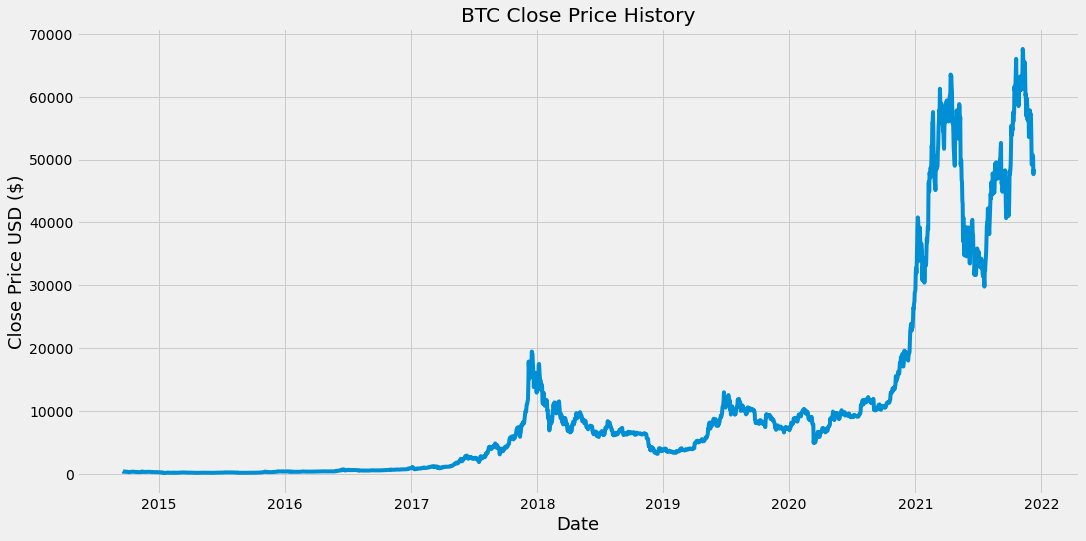

In [5]:
#Visualise the closing price
plt.figure(figsize=(16,8))
plt.title('BTC Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
#Create new df with only close column
data = df.filter(['Close'])
#Convert df to numpy array
dataset = data.values
#Get num of rows to train model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

2111

In [7]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00414359],
       [0.00365546],
       [0.00321557],
       ...,
       [0.74681178],
       [0.70477692],
       [0.71647323]])

In [8]:
#Create the training dataset
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len , :]
#Split into xtrain and ytrain 
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)

[array([0.00414359, 0.00365546, 0.00321557, 0.00342492, 0.0032753 ,
       0.00332473, 0.0038239 , 0.00363714, 0.00346454, 0.00335845,
       0.00328567, 0.00295417, 0.00292874, 0.00309905, 0.00304965,
       0.00292288, 0.00269198, 0.00223721, 0.00211322, 0.00225521,
       0.00234585, 0.00259445, 0.0027738 , 0.0027224 , 0.00273334,
       0.00297447, 0.00315054, 0.0033057 , 0.00321523, 0.00303393,
       0.00305177, 0.0031658 , 0.00313766, 0.00303822, 0.00309209,
       0.00304287, 0.00267573, 0.00267466, 0.00251033, 0.00262063,
       0.00259518, 0.00266387, 0.00233701, 0.00248116, 0.00237752,
       0.00219096, 0.00219308, 0.00221774, 0.00226134, 0.00239481,
       0.00254029, 0.00243827, 0.00248387, 0.00274766, 0.00280197,
       0.00281341, 0.00364242, 0.00360048, 0.00326041, 0.00293862])]
[0.0031129686991635463]


In [9]:
#Convert x train and y train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
#Reshape data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2051, 60, 1)

In [11]:
#Build the model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
#Train model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2051/2051 [==============================] - 62s 26ms/step - loss: 2.0246e-04


In [14]:
#Create the testing dataset
#Create a nw array containing scaled values from index 
test_data = scaled_data[training_data_len - 60: , :]
#Create the new data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [15]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [16]:
#Reshape data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [17]:
#Get model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [18]:
#Get the root mean squared error (RMSE) lower = better
rmse = np.sqrt(np.mean(predictions - y_test)**2 )
rmse

1122.5700179351277

<ipython-input-19-a9fd0068c3e2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


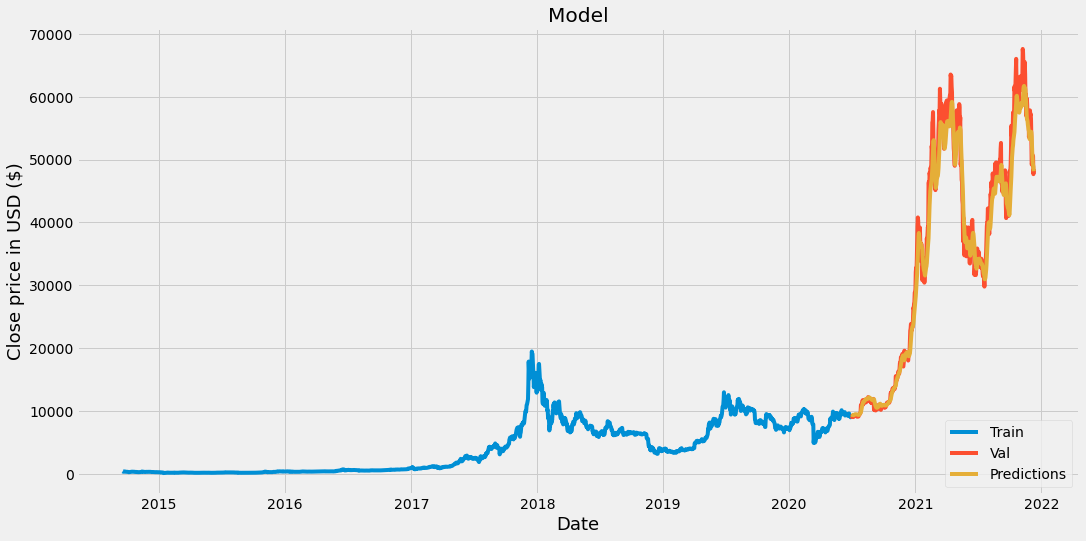

In [19]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualise data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close price in USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [20]:
#Show the actual price and predicted price
valid

,Close,Predictions
2020-06-29,9190.854492,9469.414062
2020-06-30,9137.993164,9439.890625
2020-07-01,9228.325195,9417.966797
2020-07-02,9123.410156,9419.293945
2020-07-03,9087.303711,9411.041016
...,...,...
2021-12-06,50582.625000,50500.175781
2021-12-07,50700.085938,49586.921875
2021-12-08,50504.796875,49103.007812
2021-12-09,47672.121094,48844.804688


In [21]:
#Get the quote
btc_quote = df
#create new df
new_df = btc_quote.filter(['Close'])
#Get last 60 day closing price val and convert df to an array
last_60_days = new_df[-60:].values
#Scaled data
last_60_days_scaled = scaler.transform(last_60_days)
#Create empty list
X_test = []
#Append the past 60 days 
X_test.append(last_60_days_scaled)
#Convert the X_test dataset to numpy array
X_test = np.array(X_test)
#Reshape data to be 3d
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[47633.773]]
